In [1]:
# K-MEANS CLUSTERING

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [5]:
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:,[3,4]].values
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


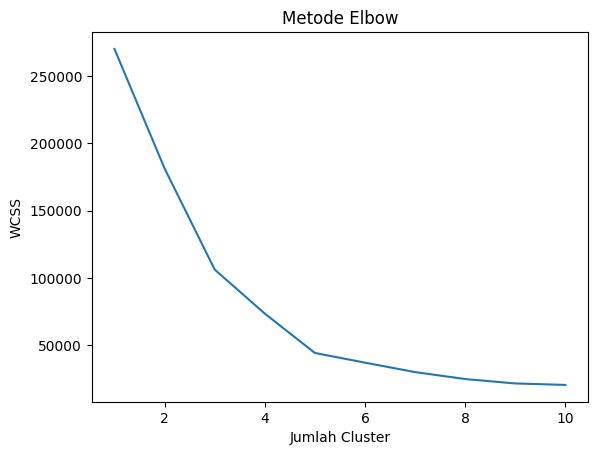

In [15]:
# Menggunakan metode elbow uintuk menemukan jum;lah cluster yang optimal

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state =0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

  # Plot grafik untuk memvisualisasikan Metode Elbow untuk menemukan jumlah cluster yang ooptimal
  # adalah jumlah kuadrat jarak antara setiap titik dan pusat massa dalam sebuah cluster

plt.plot(range(1,11),wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


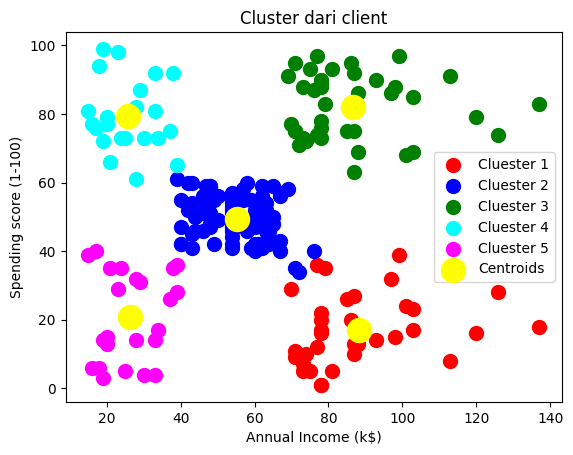

In [16]:
# Menerapkan KMeans ke dataset dengan jumlah cluster optimal

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter =300, n_init=10, random_state =0)
y_kmeans = kmeans.fit_predict(x)

#visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],s =100, c='red', label = 'Cluester 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],s =100, c='blue', label = 'Cluester 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],s =100, c='green', label = 'Cluester 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3,1],s =100, c='cyan', label = 'Cluester 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4,1],s =100, c='magenta', label = 'Cluester 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label ='Centroids')

plt.title('Cluster dari client')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()
